# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision
---
#### Tal Daniel

## Tutorial 03-04 - Convolution & Deep Learning
---

<img src="./assets/tut_conv_cnn.png" style="height:200px">

* <a href="https://mc.ai/how-does-convolutional-neural-network-work/">Image Source</a>

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [2D Convolution](#-2D-Convolution)
* [Convolution-based Classification](#-Convolutuion-as-Feature-Extractors-for-Classification)
* [Convolutional Neural Networks (CNNs)](#-Convolutional-Neural-Networks-(CNNs))
* [Regularization](#-Regularization---Preventing-Overfitting)
* [Data Augmentation](#-Data-Augmentation)
* [CIFAR-10 Classification with PyTorch](#-Building-a-CNN-Classifier-for-CIFAR-10-with-PyTorch)
* [The CNN Story](#-The-CNN-Story)
* [Other Applications of CNNs](#-CNNs-Applications-in-Computer-Vision)
* [The Problem with CNNs](#-Are-CNNs-the-Holy-Grail?-The-Problem-with-CNNs)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [2]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

## <img src="https://img.icons8.com/dusk/64/000000/layers.png" style="height:50px;display:inline"> 2D Convolution
---

Mathematically, 2D convolution is defined as: $$ f[n, m] * h[n,m] = \sum_{k=-\infty}^{\infty}\sum_{l=-\infty}^{\infty} f[k, l]\cdot h[n-k, m-l] $$

Convolution is moving a window or filter across the image being studied. This moving window applies to a certain neighborhood of nodes as shown below – here, the filter applied is (0.5 × the node value):
<img src="./assets/tut_xiv_filter.jpg" style="height:200px" />

* In our course, we will treat 2D convolution as *cross-correlation*.

### Numerical Example

<img src="./assets/tut_conv_num_ex.PNG" style="height:200px">

<img src="./assets/tut_conv_anim.gif" style="height:400px">

## <img src="https://img.icons8.com/color/96/000000/tweezers.png" style="height:50px;display:inline"> Convolutuion as Feature Extractors for Classification
---

* Convolution is useful since it helps us find interesting insights/features from images.
* For example, the gradient/derivative filter helps us detect **edges** (low-level features).

<img src="./assets/tut_conv_derv_filt.PNG" style="height:150px">

* Recall that in classification tasks we need good features for better classification performance.
* In *image classification*, we usually want to classify images into categories.
* Imagine that we have a filter for each class, and that by applying this filter, we get a **probability** for the input image to be from this filter's class. <img src="./assets/tut_conv_image_class.jpg" style="height:150px">
    * <a href="https://www.mathworks.com/solutions/deep-learning/convolutional-neural-network.html">Image Source</a>

* What are features? Consider the following illustrative example - classifying *cats* and *dogs*.
    * How do we tell the difference between cats and dogs? One can look at the length of the tail, shape of the paws, pattern of the fur and etc...
    * So humans can usually tell these just by looking at the sample. But what do computers see?
* In classification tasks, we need *good features* to learn a function that maps from samples to labels.
* **Raw pixels** are usually not expressive enough features! That is because raw pixels do not capture the *spatial relationship* in the image.
* Extracting features from raw pixels can be done using a deep learning network (which is a complex, non-linear function of the input).
    * Using just linear layers (multi-layer Perceptron) might work for simple images (e.g. MNIST), but they have a lot of parameters! See tutorial 1.5 (Deep Learning and PyTorch basics) for more details.
    * Using convolution, we can capture spatial structures (e.g., pixels the shape a tail).

## <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> Convolutional Neural Networks (CNNs)
---

* Convolutional Neural Networks (CNNs) are deep neural networks that contain layers of stacked convolution layers or filters. 
* They are mainy used for image datasets, but are also useful for other areas such as Natural Language Processing (NLP).
* In the convolutional part of the CNN, we can imagine a moving filter sliding across all the available nodes / pixels in the input image. This operation can also be illustrated using standard neural network node diagrams: <img src="./assets/tut_xiv_layer.jpg" style="height:200px" />
* The first position of the moving filter connections is illustrated by the blue connections, and the second is shown with the green lines. The weights of each of these connections, as stated previously, is 0.5 (in this example).

### CNNs Properties
---

### Feature mapping and multiple channels
---
* Since the weights of individual filters are held constant as they are applied over the input nodes, they can be trained to select certain features from the input data. 
* In the case of images, it may learn to recognize common geometrical objects such as lines, edges and other shapes which make up objects. 
* This is where the name *feature mapping* comes from. Because of this, **any convolution layer needs multiple filters which are trained to detect different features**.

### Pooling
---
It is a sliding window type technique, but instead of applying weights, which can be trained, it applies a **statistical function** of some type over the contents of its window. The most common type of pooling is called **max pooling**, and it applies the $max()$ function over the contents of the window.
There are two main benefits to pooling in CNN's:
1. It reduces the number of parameters in your model by a process called *down-sampling*
2. It makes feature detection more robust to object orientation and scale changes


* Max-pooling can be seen as "zoom-out", allowing to detect bigger objects with smaller convolutions.

<img src="./assets/tut_conv_pooling.jpeg" style="height:200px">

* <a href="https://medium.com/@duanenielsen/deep-learning-cage-match-max-pooling-vs-convolutions-e42581387cb9">Image Source </a>

* Other pooling operators:
<img src="./assets/tut_conv_other_pool.PNG" style="height:150px">

* Pooling generalizes over lower level, more complex information. 
* Let’s imagine the case where we have convolutional filters that, during training, learn to detect the digit “9” in various orientations within the input images. 
* In order for the Convolutional Neural Network to learn to classify the appearance of “9” in the image correctly, it needs to in some way “activate” whenever a “9” is found anywhere in the image, no matter what the size or orientation the digit is (except for when it looks like “6”, that is). 
* Pooling can assist with this higher level, generalized feature selection. An example can be seen <a href="https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/">here</a>.

### Strides and down-sampling
---
* In the pooling diagram below, you will notice that the pooling window shifts to the right each time by 2 places. 
* This is called a **stride of 2**, which should be considered both in the $x$ and $y$ direction. 
    * In other words, the stride is actually specified as $[2, 2]$. 
* One important thing to notice is that, if during pooling the stride is greater than 1, then the output size will be reduced. 
* As can be observed below, the 5 x 5 input is reduced to a 3 x 3 output. This is a good thing – it is called down-sampling, and it reduces the number of trainable parameters in the model.

<img src="./assets/tut_xiv_max_pool.jpg" style="height:200px" />
(images from adventuresinmachinelearning.com)

### Padding
---
* In the pooling diagram above there is an extra column and row added to the 5 x 5 input – this makes the effective size of the pooling space equal to 6 x 6. 
* This is to ensure that the 2 x 2 pooling window can operate correctly with a stride of [2, 2] and is called *padding*. 
* These nodes are basically **dummy nodes** – because the values of these dummy nodes is 0, they are basically invisible to the max pooling operation. 
* Padding will need to be considered when constructing our Convolutional Neural Network in PyTorch.

### The FC Layer
---
* The fully connected layer can be thought of as attaching a standard classifier onto the information-rich output of the network, to “interpret” the results and finally produce a classification result. 
    * That is, the output of the convolutuinal layers is the new "input features" for the classifier.
* In order to attach this fully connected layer to the network, the dimensions of the output of the Convolutional Neural Network needs to be *flattened*.

<img src="./assets/tut_conv_cnn.png" style="height:200px">

### <img src="https://img.icons8.com/color/96/000000/layers.png" style="height:50px;display:inline"> Low Level (Shallow) and High Level (Deep) Features
---
* It is quite common to observe the features (outputs of the convolutional filters) at different levels of the network.
* **Low Level** - also called shallow features (first layers), which include lines, corners and edges.
* **Mid Level** - the middel level features, usually object parts.
* **High Level** - also called deep features (final layers), which include whole objects (global).

<img src="./assets/tut_conv_low_high_level_feat.png" style="height:350px">

<a href="https://medium.com/analytics-vidhya/the-world-through-the-eyes-of-cnn-5a52c034dbeb">Image Source</a>

### Calculating a convolutional layer output size
---
We define the following parameters of a *convolutional layer*:
* $W_{in}$ - the width of the input
* $F$ - filter size
* $P$ - padding
* $S$ - stride

The output width:
$$W_{out} = \frac{W_{in} - F + 2P}{S} + 1$$

Consider the input images of size $28\times 28$, filter size of $5\times 5$, padding of 2 and a stride of 1, the output of the convolutional layers, just before the FC:
$$W_{1, out} = \frac{28 - 5 + 2*2}{1} + 1 = 28 \rightarrow MaxPooling(2x2) \rightarrow 28 / 2 = 14$$
$$W_{2, out} = \frac{14 - 5 + 2*2}{1} + 1 = 14 \rightarrow MaxPooling(2x2) \rightarrow 14 / 2 = 7$$
So the input to the FC layer is $7x7=49$ (because we have 7 for the width and 7 for the height).

### Non-Linear Activations
---
* The key change made to the Perceptron that brought upon the era of deep learning is the addition of **activation function** to the output of each neuron. 
* These allow the learning of non-linear functions. A (1-layer) neural network without an activation function is essentially just a linear regression model.

<img src="./assets/tut_conv_activation.PNG">

### Batch Normalization
---
* Batch normalization is a technique for improving the speed, performance, and stability of deep neural networks.
    *  The reasons behind its effectiveness remain under discussion
* It is used to normalize the input layer by adjusting and scaling the activations.
* Formally:
    * **Input**: $x \in \mathcal{R}^{N \times D}$
    * **Learnable Parameters**: $\gamma, \beta \in \mathcal{R}^{D} $
    * **Intermediates**: $\mu, \sigma \in  \mathcal{R}^{D}, \hat{x} \in \mathcal{R}^{N \times D}$
    * **Output**: $y \in \mathcal{R}^{N \times D}$
* In CNNs, we work with inputs of shape $[N, C, H ,W]$, where $N$ is the batch size, $C$ is the number of channels and $H, W$ are the height and width of the feature map respectively. BatchNorm in this case is performed **channel-wise**, i.e., on the channel dimension $C$ such that  $\gamma, \beta \in \mathcal{R}^{C} $.

<img src="./assets/tut_conv_bn_algo.png" style="height:300px">

### CNN Vs. Fully Connected
---
* Fully connected networks with a few layers can only do so much – to get close to state-of-the-art results in image classification it is necessary to go deeper. 
    * In other words, lots more layers are required in the network. 
* However, by adding a lot of additional layers, we come across some problems. 
    * First, we can run into the vanishing gradient problem. However, this can be solved to an extent by using sensible activation functions, such as the ReLU family of activations or using residual blocks (ResNets). 
    * Another issue for deep fully connected networks is that the number of trainable parameters in the model (i.e. the weights) can grow rapidly. 
        * This means that the training slows down or becomes practically impossible, and also exposes the model to overfitting. CNNs try to solve this second problem by exploiting correlations between adjacent inputs in images. 

### <img src="https://img.icons8.com/officel/80/000000/rope.png" style="height:50px;display:inline"> Regularization - Preventing Overfitting
---
* A common phenomenon in machine learning is that even though the training error keeps decreasing (training loss keeps going down, training accrucay goes up), the validation/test error goes down but then at some point it starts going up! (which is bad...)
* This is called **overfitting**. Although it's often possible to achieve high accuracy on the training set, what we really want is to develop models that generalize well to a testing set (or data they haven't seen before).
* If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. 
    * We need to find a balance!
* To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.
* A model trained on more complete data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like **regularization**. 
* **Regularization** places constraints on the quantity and type of information your model can store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

* The opposite of overfitting is **underfitting**. Underfitting occurs when there is still room for improvement on the test data. 
    * This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

<img src="./assets/tut_conv_overfit.png" style="height:200px">

<a href="https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/">Image Source</a>

* Regularization usually comes in form of placing constraints on the parameters, or in the case of neural networks, constraints on the weights of the layers.
* It introduces a cost term for bringing in more features with the objective function. Hence it tries to drive the coefficients of many variables to zero and hence reduce cost term.
    * Common regularizations are $L_2, L_1$ regularizations: $$ \text{New Loss}_{L_2} = \text{Original Loss} + \lambda \mid \mid w \mid \mid^2$$
* For deep neural networks (and CNNs) a common regularization technique is **Dropout**.

#### Dropout Regularization
----
* First presented in <a href="http://jmlr.org/papers/v15/srivastava14a.html">Dropout: A Simple Way to Prevent Neural Networks from Overfitting</a>, 2014.
* Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.
* During training, some number of layer outputs (i.e. neurons) are randomly ignored or “dropped out” with some probability $p$. This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer.
* Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.
* Dropout is activated **only during training** (`model.train()`). In test time, it is turned off (`model.eval()`).

Read more - <a href="https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/">A Gentle Introduction to Dropout for Regularizing Deep Neural Networks</a>

<img src="./assets/tut_conv_dropout.png" style="height:250px">

<a href="https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html">Image Source</a>

### <img src="https://img.icons8.com/dusk/64/000000/variation.png" style="height:50px;display:inline"> Data Augmentation
---
* Data augmentation is a common technique to improve results and avoid overfitting.
* How do we get more data when there is limited number of samples? We can perform data augmentation.
* Data augemnetation enriches the dataset by adding variations of the original samples.
    * And as you know, deep learning flourishes when there is A LOT of data.

* Popular augementation techniques:
    * **Flip** - Flip images horizontally and/or vertically.
    * **Rotation** - Rotate the images at certain degrees. This may change the size of the image, thus, cropping or padding is a common fix for that.
    * **Scaling** - The image can be scaled outward or inward. This may also change the size of the image, thus, resizing (also stretching) is often followed.
    * **Cropping** - Randomly sample a section from the original image. Then resize this section to the original image size. This is called Random Crop.
    * **Translation** - Move the image along the X or Y direction (or both). This forces the neural network to look everywhere.
    * **Noise** - Over-fitting usually happens when the network tries to learn high frequency features (patterns that occur a lot) that may not be useful. Gaussian noise, which has zero mean, essentially has data points in all frequencies, effectively distorting the high frequency features. This also means that lower frequency components (usually, your intended data) are also distorted, but your neural network can learn to look past that. Adding just the right amount of noise can enhance the learning capability (e.g., add Salt and Pepper).
    
Read More - <a href="https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/">Data Augmentation | How to use Deep Learning when you have Limited Data</a>

<img src="./assets/tut_conv_augment.png" style="height:300px">

<a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">Image Source</a>

## <img src="https://img.icons8.com/clouds/100/000000/dog.png" style="height:50px;display:inline"> The CIFAR-10 Dataset
---

* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>

<img src="./assets/tut_conv_cifar10.PNG" style="height:300px">


# ------------------------- <img src="https://img.icons8.com/color/96/000000/code.png" style="height:50px;display:inline"> CODE TIME -------------------------

In [2]:
# define pre-processing steps on the images
# also called "data augementation" (only done for the train set)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# load dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

trainset = torchvision.datasets.CIFAR10(
    root='./datasets', train=True, download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(
    root='./datasets', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


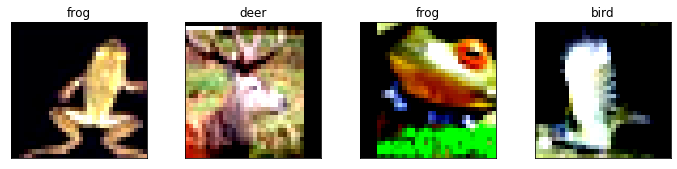

In [3]:
# let's see some of the images
def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range - approximately...
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

## <img src="https://img.icons8.com/bubbles/50/000000/fire-element.png" style="height:50px;display:inline"> Building a CNN-Classifier for CIFAR-10 with PyTorch
---

<img src="./assets/tut_conv_cifar_arch.PNG" style="height:200px">

In [9]:
class CifarCNN(nn.Module):
    """CNN for the CIFAR-10 Datset"""

    def __init__(self):
        """CNN Builder."""
        super(CifarCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [13]:
# calculating the output size of the convolutional layers, before the FC layers
dummy_input = torch.zeros([1, 3, 32, 32])
dummy_model = CifarCNN()
dummy_output = dummy_model.conv_layer(dummy_input)
print(dummy_output.shape)
dummy_output = dummy_output.view(dummy_output.size(0), -1)
print(dummy_output.shape)
# calculating the number of trainable weights
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)

torch.Size([1, 256, 4, 4])
torch.Size([1, 4096])
num trainable weights:  5852170


## <img src="https://img.icons8.com/flat_round/64/000000/presentation.png" style="height:50px;display:inline"> Training the CNN Model
---
* So we have the model, but how do we train it to output the correct class of the input image?
* As you have probably noticed, the output of the final fully-connected layer is a vector of length 10, which is exactly the number of classes we have!
* We mentioned that we want entry $i$ of the final vector to be the probability of the input to be from class $i$.
* But how do we force this vector to output probability and not just some numbers?
* We consider the final output vector to represent *scores*, which we will normalize to be probabilities using the **Softmax** function.

### <img src="https://img.icons8.com/dusk/64/000000/s.png" style="height:50px;display:inline"> The Softmax Function
---
* The Softmax function is defined as: $$ Softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^M e^{x_j}}, i \in [1,...,M], x \in \mathcal{R}^M  $$
* This forces the output vector to sum to 1, just like probabilities.
* <img src="./assets/tut_conv_softmax.PNG" style="height:150px">

### <img src="https://img.icons8.com/plasticine/100/000000/unicorn.png"  style="height:50px;display:inline"> Making Predictions
---
* OK great, we have an output vector of probabilities, so how we predict the label of the input image?
* Simple! Just take the $argmax$: $$ \hat{y} = Softmax(CNN(x)) $$ $$ c_{pred} = argmax_i (\hat{y})  $$

### <img src="https://img.icons8.com/dusk/64/000000/bearish.png" style="height:50px;display:inline"> Loss Function - Cross Entropy 
---
* In order to train the model in an end-to-end fashion, we need to define a loss function which we can minimize using optimization techniques.
* Let us assume that our model output (after softmax) is $\hat{y}$ and the real label (the real class, given to us) is $y$.
    * <img src="./assets/tut_conv_x_y.PNG" style="height:150px">
* **Insight**: $$ argmax(\hat{y}) = argmax(y) $$
* Ideally, this is what we would want from our model, so what loss function would drive $\hat{y}$ to be as close as possible to $y$?
* As $y$ is a *one-hot vector* and $\hat{y}$ represents probabilities, the **Cross Entropy** loss function fits right in!

* Let $W$ denote the weights of the CNN, and $W^{*}$ the optimal weights.
* In this case, the optimal weights are: $$ W^{*} \leftarrow argmin_{W} \left(-\sum_{x, y} 1 \cdot \log (p_c) \right) $$ $$ p_c = \hat{y}_{c} $$
* $c \in [1,...,M]$ is the correct class, $\hat{y}_{c}$ is the $c^{th}$ entry in the output vector $\hat{y}$.
* So the **Cross Entropy** loss function is: $$\mathcal{L} = -\log (p_c)$$

Let's analyze this loss fucntion, which represents how bad we are currently doing:
$$ p_c = 0 \rightarrow \mathcal{L} = -\log (0) = \infty $$
$$ p_c = 0.1 \rightarrow \mathcal{L} = -\log (0.1) = 2.3 $$
$$ p_c = 0.9 \rightarrow \mathcal{L} = -\log (0.9) = 0.1 $$
$$ p_c = 1 \rightarrow \mathcal{L} = -\log (1) = 0 $$

**The larger the loss, the worse the prediction**. We want to minimize it!

### <img src="https://img.icons8.com/nolan/64/compress.png" style="height:50px;display:inline"> Minimizing the Loss Function with Gradient Descent
---

<img src="./assets/tut_conv_gd.gif" style="height:200px">

* In order to perform Gradient Descent, we need to calculate the dervatives with respect to the network's weights.
* Due to memory reasons, when the dataset is large, we cannot compute the gradients on the whole dataset, and thus we train in **mini-batches** of the data. The `batch_size` is a *hyper-parameter* which needs to be tuned. Usually the sizes are 32, 64, 128...
* In order to propagate the gradients through all of the layers, we need to use the chain rule when calculating the gradients. This is called **backpropagation**.

### <img src="https://img.icons8.com/plasticine/100/000000/serial-tasks.png" style="height:50px;display:inline"> Backpropagation
---
* Denote the output of the $k^{th}$ layer as $f(Z^{(k)}) $ and the input to the next layer $Z^{(k+1)}$.
* **Forward Pass**: $Z^{(k+1)} = f(Z^{(k)}) $
* **Backward Pass**: $\delta^{(k+1)} = \frac{\partial E}{\partial Z^{(k+1)}}$
* Applying the **chain rule** for a single layer: $$ \frac{\partial E}{\partial Z^{(k)}} = \frac{\partial E}{\partial Z^{(k+1)}} \frac{\partial Z^{(k+1)}}{\partial Z^{(k)}} = \delta^{(k+1)}\frac{\partial Z^{(k+1)}}{\partial Z^{(k)}} = \delta^{(k+1)}\frac{\partial f(Z^{(k)})}{\partial Z^{(k)}} $$
* The **gradient with respect to layer parameters** (if it has any): $$ \frac{\partial E}{\partial W^{(k)}} = \frac{\partial E}{\partial Z^{(k+1)}} \frac{\partial Z^{(k+1)}}{\partial W^{(k)}} = \delta^{(k+1)} \frac{\partial Z^{(k+1)}}{\partial W^{(k)}}  $$


<img src="./assets/tut_conv_backprop.jpg" style="height:400px">

### <img src="https://img.icons8.com/bubbles/64/000000/discount.png" style="height:50px;display:inline"> Learning Rate
---
* As we use Gradient Descent, we also have the **learning-rate** *hyper-parameter* which needs to be tuned.
* <img src="./assets/tut_conv_lr.PNG" style="height:250px">

# ------------------------- <img src="https://img.icons8.com/color/96/000000/code.png" style="height:50px;display:inline"> CODE TIME -------------------------

In [5]:
# time to train our model
# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# dataloaders - creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = CifarCNN().to(device) # no need for parameters as we alredy defined them in the class

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [7]:
# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/cifar_cnn_ckpt.pth')

print('==> Finished Training ...')

Epoch: 1 | Loss: 1.5168 | Training accuracy: 56.276% | Test accuracy: 57.460% | Epoch Time: 61.60 secs
Epoch: 2 | Loss: 1.0972 | Training accuracy: 65.480% | Test accuracy: 66.850% | Epoch Time: 82.20 secs
Epoch: 3 | Loss: 0.9108 | Training accuracy: 70.738% | Test accuracy: 70.790% | Epoch Time: 85.79 secs
Epoch: 4 | Loss: 0.8017 | Training accuracy: 71.934% | Test accuracy: 72.200% | Epoch Time: 82.55 secs
Epoch: 5 | Loss: 0.7141 | Training accuracy: 77.510% | Test accuracy: 77.880% | Epoch Time: 90.47 secs
Epoch: 6 | Loss: 0.6533 | Training accuracy: 78.744% | Test accuracy: 77.530% | Epoch Time: 80.15 secs
Epoch: 7 | Loss: 0.6037 | Training accuracy: 80.628% | Test accuracy: 79.630% | Epoch Time: 83.42 secs
Epoch: 8 | Loss: 0.5586 | Training accuracy: 83.364% | Test accuracy: 81.740% | Epoch Time: 89.09 secs
Epoch: 9 | Loss: 0.5291 | Training accuracy: 83.362% | Test accuracy: 81.300% | Epoch Time: 81.84 secs
Epoch: 10 | Loss: 0.4992 | Training accuracy: 84.848% | Test accuracy: 82

test accuracy: 84.950%


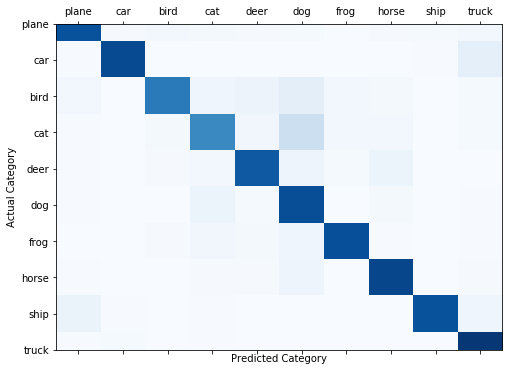

In [8]:
# load model, calculate accuracy and confusion matrix
model = CifarCNN().to(device)
state = torch.load('./checkpoints/cifar_cnn_ckpt.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU(inplace=True)
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Dropout2d(p=0.05, inplace=False)
  (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): ReLU(inplace=True)
  (16): Conv2d(2

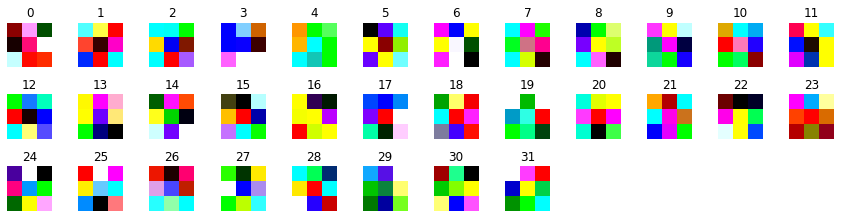

In [9]:
# visualize filters - more methods in the appendix to this tutorial
# observe available layers, in our case, the stacked layers are called "conv_layer"
print(model.conv_layer)
# extracting the model features at the particular layer number
layer = model.conv_layer[0]  # to plot other layers, see the appendix tutorial
# get the weights
weight_tensor = layer.weight.data.cpu()

# get the number of kernals
num_kernels = weight_tensor.shape[0]    

#define number of columns for subplots
num_cols = 12
# rows = num of kernels
num_rows = num_kernels

#set the figure size
fig = plt.figure(figsize=(num_cols, num_rows))

# looping through all the kernels
for i in range(weight_tensor.shape[0]):
    ax1 = fig.add_subplot(num_rows, num_cols, i+1)

    #for each kernel, we convert the tensor to numpy 
    npimg = np.array(weight_tensor[i].numpy(), np.float32)
    #standardize the numpy image
    npimg = (npimg - np.mean(npimg)) / np.std(npimg)
    npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
    npimg = npimg.transpose((1, 2, 0))
    ax1.imshow(npimg)
    ax1.axis('off')
    ax1.set_title(str(i))
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

plt.tight_layout()

## <img src="https://img.icons8.com/bubbles/50/000000/book-shelf.png" style="height:50px;display:inline"> The CNN Story
---

* **1996** - Lenet-5 - core of CNR check reading system, used by US banks.
<img src="./assets/tut_conv_lenet5.gif" style="height:200px">

* **2012** - ILSVRC - Imagenet Large Scale Visual Recognition Challenge
    * Imagenet data base: 14M labeled images, 20K categories.
    * <img src="./assets/tut_conv_imagenet.PNG" style="height:300px">

* **2012** - AlexNet wins the challenge by a significant margin!
    * <img src="./assets/tut_conv_ilv_12.PNG" style="height:300px">

* **2013** - thanks to deep CNNs, the results only keep improving.
    * <img src="./assets/tut_conv_ilv_13.PNG" style="height:300px">

* **Today** - <a href="https://paperswithcode.com/sota/image-classification-on-imagenet">Link</a>
    * <img src="./assets/tut_conv_ilv_20.PNG" style="height:300px">

## <img src="https://img.icons8.com/clouds/100/000000/lightning-bolt.png" style="height:50px;display:inline"> CNNs Applications in Computer Vision
---
* **Object Detection**
    * <img src="./assets/tut_conv_obj_det.PNG" style="height:200px">
    * <a href="https://medium.com/better-programming/real-time-object-detection-on-gpus-in-10-minutes-6e8c9b857bb3"> Source</a>

* **Semantic Segmentation**
    * <img src="./assets/tut_conv_segnet.png" style="height:200px">
    * <a href="https://missinglink.ai/guides/computer-vision/image-segmentation-deep-learning-methods-applications/">Source</a>

* **Super Resolution**
    * <img src="./assets/tut_conv_superres.PNG" style="height:300px">
    * <a href="https://arxiv.org/pdf/1609.04802.pdf">Source</a>

* **Style Transfer**
    * <img src="./assets/tut_conv_style_trans.jpeg" style="height:300px">
    * <a href="https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-neural-style-transfer-ef88e46697ee">Source</a>

* **Image Editing**
    * <img src="./assets/tut_conv_image_edit.jpg" style="height:300px">
    * <a href="http://people.csail.mit.edu/junyanz/projects/gvm/">Source</a>

* **Image Generation**
    * StyleGAN V2 - <a href="https://thispersondoesnotexist.com/">thispersondoesnotexist.com</a>

* **Multi-Signals**
    * Synthesizing Obama: Learning Lip Sync from Audio
    * <img src="./assets/tut_conv_obama.png" style="height:300px">
    * <a href="http://grail.cs.washington.edu/projects/AudioToObama/">Source</a>

## <img src="https://img.icons8.com/cute-clipart/64/000000/easter-egg.png" style="height:50px;display:inline"> Are CNNs the Holy Grail? The Problem with CNNs
---
#### Deep NNs are sensitive to adversarial attacks.
* For example: consider the following image, where on the left, we have an image of a pig that is correctly classified by a state-of-the-art convolutional neural network. 
* After perturbing the image slightly (every pixel is in the range [0, 1] and changed by at most 0.005), the network now returns class “airliner” with high confidence.
    
<img src="./assets/tut_conv_pig.png" style="height:200px">

<a href="http://gradientscience.org/intro_adversarial/">Image Source</a>

#### Recognition algorithms generalize poorly to new environments

<img src="./assets/tut_conv_cow.PNG" style="height:200px">

<a href="https://arxiv.org/pdf/1807.04975.pdf">Recognition in Terra Incognita (Beery et al., 2018)</a>

#### Neural Networks tend to exhibit undesirable biases
<img src="./assets/tut_conv_fairness.PNG" style="height:300px">

* The reasons why the model learns these biases are unclear. 
    * One hypothesis is that despite the balanced distribution of races in pictures labeled basketball, black persons are more represented in this class in comparison to the other classes

<a href="https://arxiv.org/abs/1711.11443">ConvNets and ImageNet Beyond Accuracy: Understanding Mistakes and Uncovering Biases (Stock and Cisse, 2018)</a>

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* Convolutional Neural Networks -  <a href="https://www.youtube.com/watch?v=iaSUYvmCekI"> Convolutional Neural Networks | MIT 6.S191 </a>
    * A previous version of this lecture - <a href="https://www.youtube.com/watch?v=H-HVZJ7kGI0"> Convolutional Neural Networks | MIT 6.S191 </a>
* Deep Neural Networks with PyTorch - <a href="https://www.youtube.com/watch?v=_H3aw6wkCv0&t"> Stefan Otte: Deep Neural Networks with PyTorch | PyData Berlin 2018 </a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Some slides from CS131 and CS231n (Stanford)
* Deep Learning with Pytorch on CIFAR10 Dataset - <a href="https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/">Zhenye's Blog</a>
* CIFAR-10 Classifier Using CNN in PyTorch - <a href="https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/">Stefan Fiott</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com